In [6]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from statsmodels.tsa.stattools import acf

In [7]:
omegam, chi2=np.load("chi2desi.php")

In [8]:
from scipy.interpolate import interp1d
interp_chi2=interp1d(omegam, chi2, kind="cubic")

In [10]:
def MCMC(x0, n_steps, x_min, x_max):
  chain=[]
  acceptance=[]
  chi2_chain=[interp_chi2(x0)] #inizializzazione di chi2_chain
  chain.append(x0)
  acceptance.append(True)

  for i in range(n_steps):
    x_try=np.random.uniform(x_min, x_max)
    f_try=interp_chi2(x_try) #calcolo di f_try
    f_old=chi2_chain[-1]
    log_ratio=-0.5*(f_try-f_old) #calcolo del rapporto di log-verosimiglianza corretto
    log_u=np.log(np.random.uniform())
    if log_ratio>log_u:
      chain.append(x_try)
      chi2_chain.append(f_try)
      acceptance.append(True)
    else:
      chain.append(chain[-1])
      chi2_chain.append(chi2_chain[-1]) #correzione dell'errore di ortografia
      acceptance.append(False)

  return chain, chi2_chain, acceptance #deindentazione di return





In [11]:
x_min=0.23
x_max=0.37

n_steps=100000
x0=0.23

chain, chi2_chain, acceptance = MCMC(x0, n_steps, x_min, x_max)

In [12]:
acceptance_rate = acceptance.count(True) / len(acceptance)
print(f"Acceptance rate: {acceptance_rate:.2f}")


Acceptance rate: 0.20


<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\O'
/var/folders/xy/lbzxg6rn2xzgh0qsqvgchmz40000gn/T/ipykernel_5950/3355347468.py:2: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel("$\Omega_m$")


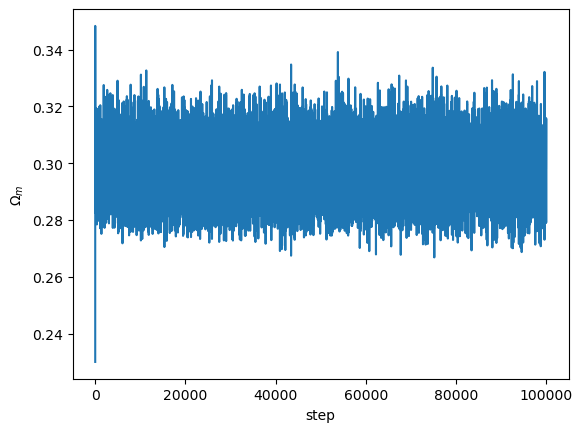

In [13]:
plt.xlabel("step")
plt.ylabel("$\Omega_m$")
plt.plot(chain)
plt.show()

In [14]:
burn_in = 100  # Sostituisci con il valore appropriato per il tuo caso
chain_after_burn_in = chain[burn_in:]

# Calcola la media
omega_m_mean = np.mean(chain_after_burn_in)

# Calcola la deviazione standard
omega_m_std = np.std(chain_after_burn_in)

print(f"Stima di Omega_m (media): {omega_m_mean:.4f} +/- {omega_m_std:.4f}")

Stima di Omega_m (media): 0.2980 +/- 0.0088


Tempo di correlazione: 4


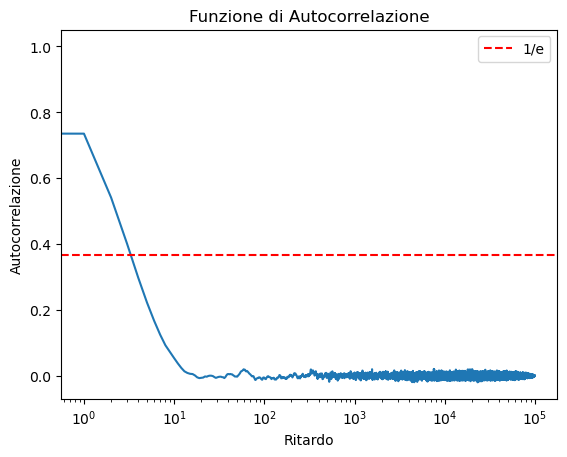

In [15]:
autocorr = acf(chain_after_burn_in, nlags=len(chain_after_burn_in) -1)
   # Trova il primo ritardo in cui l'autocorrelazione scende sotto 1/e
tau = np.argmax(autocorr < 1/np.e)
print(f"Tempo di correlazione: {tau}")
plt.plot(autocorr)
plt.xlabel("Ritardo")
plt.ylabel("Autocorrelazione")
plt.xscale("log")
plt.title("Funzione di Autocorrelazione")
plt.axhline(y=1/np.e, color='r', linestyle='--', label='1/e') #linea orizzontale per evidenziare la soglia di 1/e
plt.legend() #aggiunge una legenda al grafico per identificare la linea orizzontale
plt.show()